In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters

print(tf.__version__)

2.7.0


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 129s 61us/step


In [30]:
print(train_data.shape, train_labels.shape)
# Manual one-hot encoding for labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

# Keras inbuilt function
y_train, y_test = to_one_hot(train_labels), to_one_hot(test_labels)

# Multi hot encode input data
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(8982,) (8982,)


In [12]:
# Each article can only belong to one class
max(np.sum(labels) for labels in y_train)

1.0

In [36]:
from tensorflow.keras import layers

model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax")
])

In [37]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

print(x_val.shape, y_val.shape)
print(x_train.shape, y_train.shape)

(1000, 10000) (1000, 46)
(5982, 10000) (5982, 46)


In [39]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
12/12 [==============================] - 1s 29ms/step - loss: 2.8407 - accuracy: 0.4305 - val_loss: 2.0147 - val_accuracy: 0.6040
Epoch 2/20
12/12 [==============================] - 0s 18ms/step - loss: 1.5948 - accuracy: 0.6695 - val_loss: 1.4878 - val_accuracy: 0.6710
Epoch 3/20
12/12 [==============================] - 0s 18ms/step - loss: 1.1540 - accuracy: 0.7556 - val_loss: 1.2892 - val_accuracy: 0.7210
Epoch 4/20
12/12 [==============================] - 0s 18ms/step - loss: 0.9167 - accuracy: 0.8079 - val_loss: 1.1765 - val_accuracy: 0.7580
Epoch 5/20
12/12 [==============================] - 0s 18ms/step - loss: 0.7394 - accuracy: 0.8506 - val_loss: 1.1093 - val_accuracy: 0.7610
Epoch 6/20
12/12 [==============================] - 0s 19ms/step - loss: 0.6003 - accuracy: 0.8830 - val_loss: 1.0491 - val_accuracy: 0.7780
Epoch 7/20
12/12 [==============================] - 0s 18ms/step - loss: 0.4910 - accuracy: 0.9039 - val_loss: 1.0340 - val_accuracy: 0.7770
Epoch 8/20
12

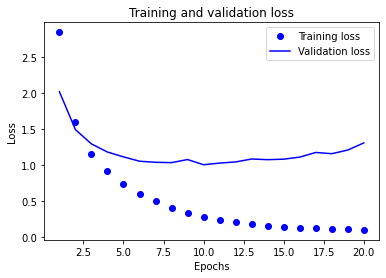

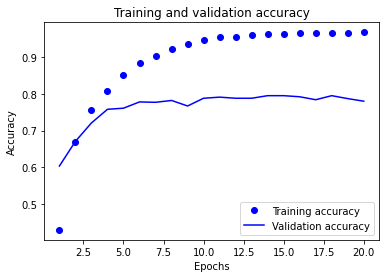

In [40]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
# Model seems to overfit after 8 epochs, let's train a new one
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=8,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
12/12 [==============================] - 1s 15ms/step - loss: 2.8510 - accuracy: 0.4500
Epoch 2/8
12/12 [==============================] - 0s 14ms/step - loss: 1.6064 - accuracy: 0.6615
Epoch 3/8
12/12 [==============================] - 0s 15ms/step - loss: 1.1630 - accuracy: 0.7531
Epoch 4/8
12/12 [==============================] - 0s 15ms/step - loss: 0.9207 - accuracy: 0.8012
Epoch 5/8
12/12 [==============================] - 0s 16ms/step - loss: 0.7429 - accuracy: 0.8429
Epoch 6/8
12/12 [==============================] - 0s 15ms/step - loss: 0.5982 - accuracy: 0.8755
Epoch 7/8
12/12 [==============================] - 0s 15ms/step - loss: 0.4802 - accuracy: 0.9027
Epoch 8/8
71/71 [==============================] - 0s 2ms/step - loss: 1.0329 - accuracy: 0.7685


In [44]:
results

[1.03289794921875, 0.7684773206710815]

In [69]:
# let's experiment with information bottleneck by using a 2D intermediate layer

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)).history

Epoch 1/20
47/47 [==============================] - 1s 12ms/step - loss: 1.9398 - accuracy: 0.6057 - val_loss: 1.3946 - val_accuracy: 0.6840
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.7663 - val_loss: 1.1366 - val_accuracy: 0.7410
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.7314 - accuracy: 0.8358 - val_loss: 1.0522 - val_accuracy: 0.7700
Epoch 4/20
47/47 [==============================] - 0s 10ms/step - loss: 0.5066 - accuracy: 0.8937 - val_loss: 0.9950 - val_accuracy: 0.7840
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.3524 - accuracy: 0.9291 - val_loss: 0.9650 - val_accuracy: 0.7920
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - loss: 0.2550 - accuracy: 0.9470 - val_loss: 1.0168 - val_accuracy: 0.7990
Epoch 7/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1989 - accuracy: 0.9560 - val_loss: 1.0355 - val_accuracy: 0.7920
Epoch 8/20
47/47 [

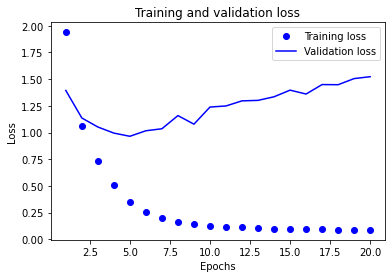

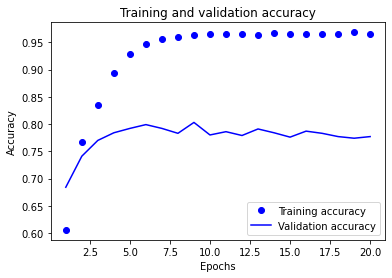

In [70]:
loss = history["loss"]
val_loss = history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history["accuracy"]
val_acc = history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()